### 比较两个信号的频率成分
#### 频谱相干性有助于识别频域中信号之间的相似性。大数值表示信号共有的频率分量。
#### 将两个声音信号加载到工作区中。以 1 kHz 的频率对其进行采样。使用 periodogram 计算其功率频谱，并以彼此相邻的方式对其绘图。

In [ ]:
from scipy.io import loadmat
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

mat = loadmat("relatedsig.mat")
Fs = mat["FsSig"]
sig1 = mat["sig1"]
sig2 = mat["sig2"]
#npy_lsp = np.matrix.transpose(npy_lsp)
f1, P1 = signal.periodogram(sig1, Fs)
f2, P2 = signal.periodogram(sig2, Fs)



fig, ax1 = plt.subplots()
ax1.set_title('Power spectrum')
ax1.plot(f1.flat, P1.flat)
ax1.set_ylabel('P1')
ax1.set_xlabel('Frequency(Hz)')

fig, ax2 = plt.subplots()
ax2.set_title('Power spectrum')
ax2.plot(f2.flat, P2.flat)
ax2.set_ylabel('P2', color='r')
ax2.set_xlabel('Frequency(Hz)')
plt.show()

In [228]:
# peaks,_,_ = signal.find_peaks(P1.flat,height=0.05,distance=1)
peakind = signal.find_peaks_cwt(P1.flat, np.arange(1,70))
P1peakFreqs = f1.flat[peakind]
print(P1peakFreqs)
peakind = signal.find_peaks_cwt(P2.flat, np.arange(1,90))
P2peakFreqs = f2.flat[peakind]
print(P2peakFreqs)

[ 36.  95. 166. 264. 409. 490.]
[ 35. 165. 350. 416.]


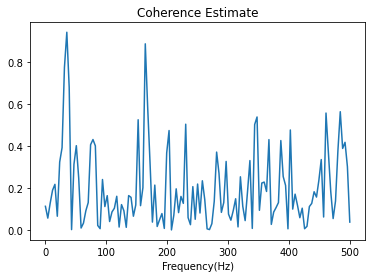

In [229]:
f,Cxy = signal.coherence(sig1,sig2,fs=Fs)
thresh = 0.75
pks,locs =signal.find_peaks(Cxy.flat,threshold=0.75)
MatchingFreqs = f1.flat[pks]
fig, ax3 = plt.subplots()
ax3.set_title('Coherence Estimate')
ax3.plot(f.flat, Cxy.flat)
ax3.set_xlabel('Frequency(Hz)')
plt.show()

#### 您得到的值和以前一样。您可以找到两个信号共有的频率成分，而无需分别研究这两个信号。